In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from kneed import KneeLocator

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [42]:
pcaData = pd.read_csv('./Data/PCAData.csv')
pcaData.drop(['Player','Team'],axis=1,inplace=True)
pcaData.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,-0.0,0.0,-0.0,-0.0,0.0
std,5.4,4.7,2.8,2.5,2.1
min,-10.4,-8.2,-7.1,-6.3,-5.7
25%,-4.1,-3.3,-1.9,-1.6,-1.5
50%,-1.2,-1.0,-0.2,-0.0,-0.0
75%,3.3,2.3,1.9,1.6,1.3
max,16.9,16.5,8.1,8.9,9.6


In [43]:
pcaData

,PC1,PC2,PC3,PC4,PC5
0,-5.973640,10.348598,-4.544328,-2.790883,-1.291382
1,-1.975250,9.700635,-2.386559,-4.657934,-0.569510
2,-7.131777,11.506774,-0.629350,-4.972975,1.235958
3,14.068326,14.403856,-3.423371,4.085493,9.550238
4,8.082776,13.723707,2.125949,-1.052888,1.960181
...,...,...,...,...,...
392,-1.767053,-6.117506,2.412929,3.375371,1.891360
393,-5.746449,-3.612010,7.457901,3.099955,3.200641
394,-2.157475,-8.238167,2.602166,1.469678,1.456859
395,-1.642875,-7.951736,1.809158,-1.508661,1.187768


In [44]:
# to standardise the principle components
scaler = StandardScaler()
pcaDataScaled = scaler.fit_transform(pcaData)


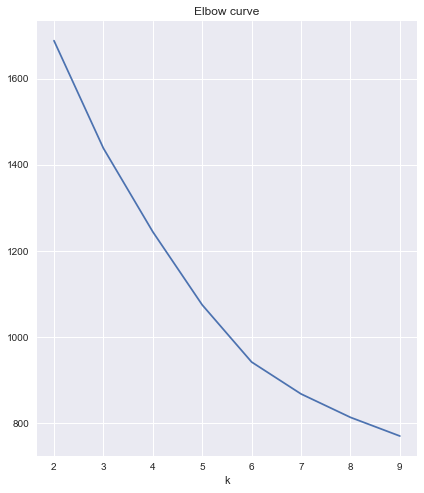

In [45]:
# Picking Best number of k part, using elbow method 
# Specifying the dataset and initializing variables
X = pcaDataScaled
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [46]:
kl = KneeLocator(range(2,10), distorsions, curve="convex", direction="decreasing")
kl.elbow

6

In [47]:
# Generate silhouette coefficient for each k
X = pcaDataScaled
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

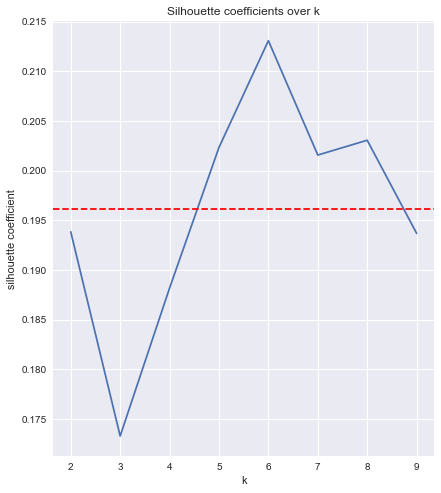

In [48]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [49]:
# # check if components are standardised
# pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])
# pcaDataScaled.describe().round(1)

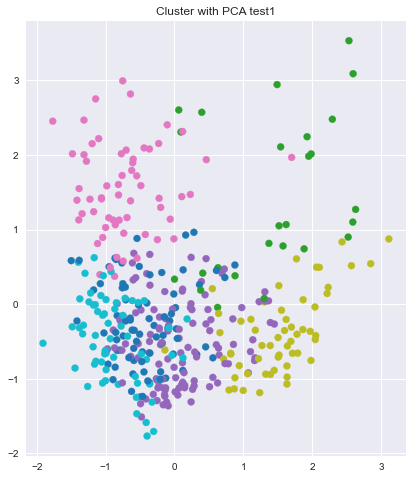

In [50]:
#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=6, random_state=2).fit_predict(pcaDataScaled)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster with PCA test1')

plt.scatter(pcaDataScaled[:,0], pcaDataScaled[:,1], c=km_neat, cmap=cmap)

In [51]:
km_neat

array([3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 0, 2, 1,
       2, 2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 4, 3, 3, 2, 1, 0,
       3, 0, 0, 1, 2, 4, 4, 3, 4, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 4, 0,
       3, 2, 1, 2, 2, 0, 0, 5, 3, 0, 3, 0, 4, 2, 0, 2, 0, 5, 4, 0, 0, 2,
       2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 5, 2, 5, 4, 2, 4, 2,
       4, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 5, 5, 0, 0, 0, 0, 4, 4, 3, 5, 5,
       5, 2, 0, 0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 4, 4, 2, 5, 2, 1, 5, 4, 2, 2, 4, 2, 2, 5, 5, 4,
       4, 5, 0, 2, 5, 2, 5, 4, 2, 5, 0, 2, 4, 0, 0, 4, 5, 2, 2, 5, 4, 5,
       4, 5, 5, 5, 0, 5, 2, 5, 2, 4, 0, 4, 2, 0, 5, 2, 4, 5, 5, 2, 4, 2,
       2, 2, 2, 4, 0, 4, 4, 0, 0, 2, 4, 2, 0, 4, 0, 5, 2, 5, 2, 2, 0, 0,
       5, 5, 5, 5, 5, 2, 2, 5, 4, 4, 4, 2, 0, 0, 2,

In [54]:
kmeancluster =pd.read_csv('./Data/PCAData.csv')
kmeancluster['Cluster']=km_neat

In [55]:
kmeancluster

,PC1,PC2,PC3,PC4,PC5,Player,Team,Cluster
0,-5.973640,10.348598,-4.544328,-2.790883,-1.291382,Stephen Curry,GSW,3
1,-1.975250,9.700635,-2.386559,-4.657934,-0.569510,Bradley Beal,WAS,3
2,-7.131777,11.506774,-0.629350,-4.972975,1.235958,Damian Lillard,POR,3
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI,1
4,8.082776,13.723707,2.125949,-1.052888,1.960181,Giannis Antetokounmpo,MIL,1
...,...,...,...,...,...,...,...,...
392,-1.767053,-6.117506,2.412929,3.375371,1.891360,Nicolo Melli,DAL,5
393,-5.746449,-3.612010,7.457901,3.099955,3.200641,Matthew Dellavedova,CLE,5
394,-2.157475,-8.238167,2.602166,1.469678,1.456859,KZ Okpala,MIA,5
395,-1.642875,-7.951736,1.809158,-1.508661,1.187768,Wes Iwundu,NOP,5


In [65]:
kmeancluster['Cluster'].value_counts()

2    116
0     76
5     63
3     60
4     56
1     26
Name: Cluster, dtype: int64

In [59]:
cluster1 = kmeancluster[kmeancluster['Cluster'] == 1]

In [60]:
cluster1

,PC1,PC2,PC3,PC4,PC5,Player,Team,Cluster
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI,1
4,8.082776,13.723707,2.125949,-1.052888,1.960181,Giannis Antetokounmpo,MIL,1
8,0.507119,10.761188,-3.104618,0.352497,3.570327,Kevin Durant,BKN,1
12,13.740606,16.467250,1.035286,8.918870,4.535435,Nikola Jokic,DEN,1
17,0.333270,12.137660,-0.661454,1.620786,3.451613,Kawhi Leonard,LAC,1
18,10.444115,10.467268,-2.933795,4.057168,3.842864,Karl-Anthony Towns,MIN,1
22,2.146523,11.991856,-0.771680,3.127663,1.297409,Julius Randle,NYK,1
25,8.361508,9.831955,-3.809735,7.976643,5.619692,Nikola Vucevic,CHI,1
30,10.765548,9.390946,-0.876637,3.982718,5.146173,Anthony Davis,LAL,1
36,8.795259,4.976932,-3.598052,-0.431872,0.377500,Christian Wood,HOU,1


In [61]:
cluster2 = kmeancluster[kmeancluster['Cluster'] == 2]

In [62]:
cluster2

,PC1,PC2,PC3,PC4,PC5,Player,Team,Cluster
46,-2.191723,1.912423,-6.244116,-1.933155,-1.504723,Malik Beasley,MIN,2
51,3.925085,2.197248,-6.609128,0.342394,-0.863691,Michael Porter Jr.,DEN,2
54,-3.314511,2.581243,-4.173907,-1.949490,-1.826146,Norman Powell,POR,2
64,-3.205066,3.181600,-3.937988,-2.716296,-1.140868,Evan Fournier,BOS,2
66,-1.947322,3.111394,-5.437495,-0.530359,0.029094,Bojan Bogdanovic,UTA,2
...,...,...,...,...,...,...,...,...
379,-0.887163,-6.286985,-1.564845,2.119187,2.227829,Mike Scott,PHI,2
380,2.761550,-5.156591,0.637405,-4.978631,1.448442,Lamar Stevens,CLE,2
383,-0.787059,-5.654466,-1.426250,-1.952816,2.537994,DaQuan Jeffries,SAS,2
388,-1.219542,-5.102918,1.431915,-2.396945,1.245498,Brodric Thomas,CLE,2
